In [5]:
#Ayush Pandhi [1003227457] [University of Toronto]
#Chloe Cheng [1003254818] [University of Toronto]

#Import required modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import numpy.linalg

#Defining the two guassian quadrature functions from the text
#Gaussian quadrature function 1 from text
def gaussxw(N):
    
    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))
    
    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = np.max(np.abs(dx))
        
    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    
    return x,w

#Gaussian quadrature frunction 2 from text
def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

No handles with labels found to put in legend.


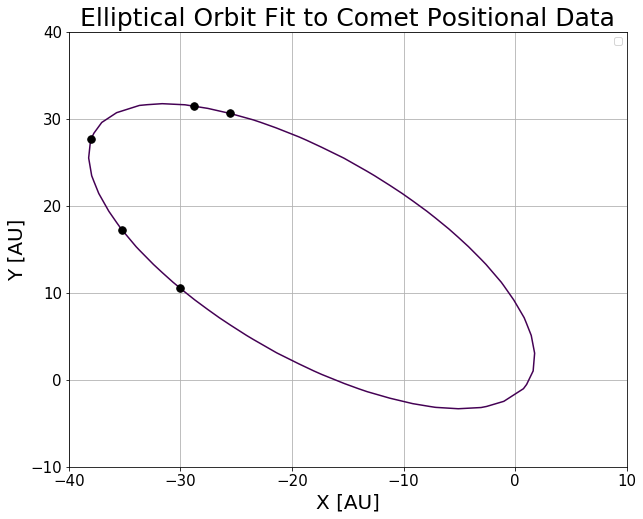

The semi-major axis for this orbit is  24.35792154021969 AU.
The semi-minor axis for this orbit is  10.774132252715324 AU.
The eccentricity for this orbit is  0.8968545388469203 .
The perihelion for this orbit is  2.512409049996492 AU.
The aphelion for this orbit is  46.203434030442885 AU.
The period for this orbit is  125.40458483341271 years.


In [6]:
#PROBLEM 1

#PART A
#Defining functions to compute various astronomical parameters
def semimajor(a, b, c, d, f, g): #Takes ellipse parameters
    return np.sqrt((2*(a*f**2 + c*d**2 + g*b**2 - 2*b*d*f - a*c*g))/((b**2 - a*c)*(np.sqrt((a - c)**2 + 4*b**2) - (a + c))))

def semiminor(a, b, c, d, f, g): #Takes ellipse parameters
    return np.sqrt((2*(a*f**2 + c*d**2 + g*b**2 - 2*b*d*f - a*c*g))/((b**2 - a*c)*(-np.sqrt((a - c)**2 + 4*b**2) - (a + c))))

def eccentricity(a, b): #Takes semimajor and semiminor axes
    return np.sqrt(1 - (b**2/a**2))

def perihelion(a, b): #Takes semimajor and semiminor axes
    return a*(1 - eccentricity(a,b))

def aphelion(a,b): #Takes semimajor and semiminor axes
    return a*(1 + eccentricity(a,b))

def x_centre(a, b, c, d, f, g): #Takes ellipse parameters
    return ((c*d - b*f)/(b**2 - a*c))

def y_centre(a, b, c, d, f, g): #Takes ellipse parameters
    return ((a*f - b*d)/(b**2 - a*c))

def period(a, b, ra, v): #Takes semimajor axis, semiminor axis, aphelion, and velocity at aphelion
    return ((2*np.pi*a*b)/(ra*v))

#PART B
#Create arrays of data given in table 1 in the lab manual
x = np.array([-38.04, -35.28, -25.58, -28.80, -30.06])
y = np.array([27.71, 17.27, 30.68, 31.50, 10.53])

#Computing components of the X array
entry1 = x**2
entry2 = x*y
entry3 = y**2
ones = np.ones(len(x))

#Creating the X array corresponding to the ellipse equation terms
X = np.zeros((5, 6))
for i in range(6):
    for j in range(5):
        X[j][0] = entry1[j]
        X[j][1] = entry2[j]
        X[j][2] = entry3[j]
        X[j][3] = x[j]
        X[j][4] = y[j]
        X[j][5] = ones[j]
        
#Computing the S array as a dot product of X^T and X
S = np.dot(X.T,X)

#Getting the inverse of S
S_inv = numpy.linalg.inv(S)

#Create array Y
Y = np.array([[0, 0, 0, 0, 0, 0],
             [0, -1/4, 0, 0, 0, 0],
             [4, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0]])

#Solving the eigenvalue equation with numpy.linalg
E, V = numpy.linalg.eig(np.dot(S_inv, Y))

#Getting the transpose array of V
V = V.T

#Define parameters of ellipse fit
A, B2, C, D2, F2, G = V[4]   #The index [4] corresponds to the only significantly non-zero eigenvalue
B = B2/2                     #Divinding by a factor of 2 to get B
D = D2/2                     #Divinding by a factor of 2 to get D
F = F2/2                     #Divinding by a factor of 2 to get F

#Define equations to be used in plotting the ellipse
x_pts = np.linspace(-50,50)
y_pts = np.linspace(-50,50)
X_test, Y_test = np.meshgrid(x_pts, y_pts)
eqn = (A*(X_test**2)) + (2*B*X_test*Y_test) + (C*(Y_test**2)) + (2*D*X_test) + (2*F*Y_test) + G
Z = 0

#Plot the data with the ellipse fit on top
plt.figure(figsize=(10,8))
plt.contour(X_test,Y_test, eqn, [Z])
plt.plot(x, y, linestyle='None', marker='.', markersize=15, color='k')
plt.title('Elliptical Orbit Fit to Comet Positional Data', fontsize=25)
plt.xlabel('X [AU]', fontsize=20)
plt.ylabel('Y [AU]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-40, 10)
plt.ylim(-10, 40)
plt.grid()
plt.legend()
plt.savefig('lab4_q1_plot1.pdf', bbox_inches='tight')
plt.show()

#Calculate astronomical parameters based on the ellipse fit parameters
s_major = semimajor(A, B, C, D, F, G)           #AU
s_minor = semiminor(A, B, C, D, F, G)           #AU
ecc = eccentricity(s_major,s_minor)             #Dimensionless
peri = perihelion(s_major,s_minor)              #AU
aph = aphelion(s_major,s_minor)                 #AU
v = 9.02419e-9                                  #AU/s
T = period(s_major, s_minor, aph, v)*3.17098e-8 #Convert from seconds to years

#Printing results from comptued parameters above
print("The semi-major axis for this orbit is ", s_major, "AU.")
print("The semi-minor axis for this orbit is ", s_minor, "AU.")
print("The eccentricity for this orbit is ", ecc, ".")
print("The perihelion for this orbit is ", peri, "AU.")
print("The aphelion for this orbit is ", aph, "AU.")
print("The period for this orbit is ", T, "years.") 

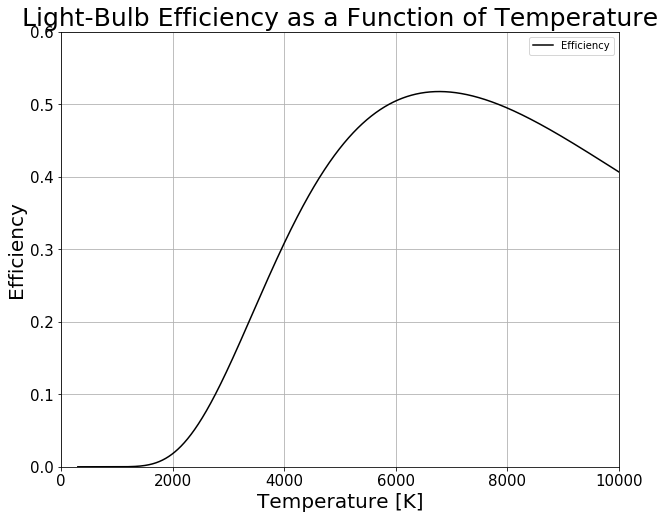

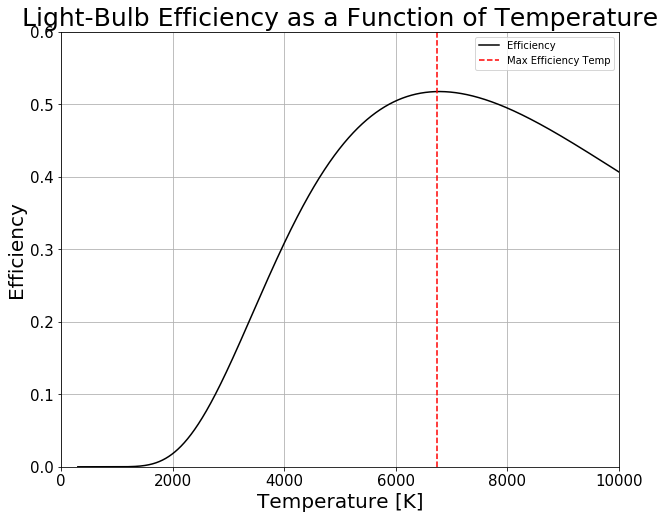

The maximum efficiency of the system ( 0.5176863184609405 ) is found at 6728.865979381443 K.


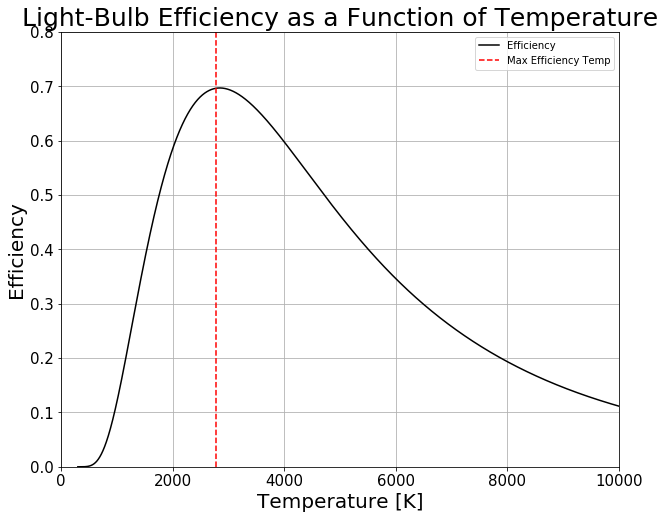

The maximum efficiency of the system ( 0.6945884755062723 ) is found at 2771.134020618557 K.


In [3]:
#PROBLEM 2

#PART A
#Define constants
h = const.h #Planck's constant [m2 kg s^-1]
c = const.c #Speed of light constant [m s^-1]
k = const.k #Boltzmann constant [m^2 kg s-2 K-1]

#Define function for power per unit wavelength of a blackbody
def power(A, rad, T):
    I = 2*np.pi*A*h*(c**2)*((rad**(-5))/np.exp((h*c)/(rad*k*T) - 1))
    return I

#Define function for total energy radiated between 2 wavelengths
def energy(N, rad1, rad2, A, T):
    #Applying the gaussian quadrature function
    x, w = gaussxwab(N, rad1, rad2)
    #Using gaussian quadrature to compute the integral for T 
    E = 0
    for i in range(N):
        E += w[i]*(power(A, x[i], T))
    return E
        
#Define function for efficiency
def efficiency(N, rad1, rad2, A, T):
    eta = energy(N, rad1, rad2, A, T)/energy(N, 0, 1, A, T)
    return eta

#Defining values for the given blackbody problem
T = np.arange(300,10000)  #Range of temperature values [K]
rad1 = 3.8e-7             #Lower limit of integration [m]
rad2 = 7.8e-7             #Upper limit of integration [m]
N = 10000                 #Number of sample points
A = 8e-5                  #Surface area of tungsten filament [m]

#Computing the efficiency given the above values
eta = efficiency(N, rad1, rad2, A, T)

#Plot efficiency as a function of temperature
plt.figure(figsize=(10,8))
plt.plot(T, eta, color='k', label='Efficiency')
plt.title("Light-Bulb Efficiency as a Function of Temperature", fontsize=25)
plt.xlabel("Temperature [K]", fontsize=20)
plt.ylabel("Efficiency", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,10000)
plt.ylim(0,0.6)
plt.grid()
plt.legend()
plt.savefig('lab4_q2_plot1.pdf', bbox_inches='tight')
plt.show()

#PART B (code modified from Newman 2013)
#Defining accuracy threshold and the golden ratio
accuracy = 1e-4
z = (1+np.sqrt(5))/2

# Initial positions of the four points
x1 = 3000
x4 = 9000
x2 = 4000
x3 = 6000

# Initial values of the function at the four points
f1 = eta[x1]
f2 = eta[x2]
f3 = eta[x3]
f4 = eta[x4]

# Main loop of the search process
while x4-x1>accuracy:
    if f2>f3:
        x4,f4 = x3,f3
        x3,f3 = x2,f2
        x2 = int(x4 - (x4-x1)/z)
        f2 = eta[x2]
    else:
        x1,f1 = x2,f2
        x2,f2 = x3,f3
        x3 = int(x1 + (x4-x1)/z)
        f3 = eta[x3]
        
#Calculate the maximum efficiency
max_efficiency = int(0.5*(x1+x4))

#Plot efficiency as a function of temperature
plt.figure(figsize=(10,8))
plt.plot(T, eta, color='k', label='Efficiency')
plt.axvline(x=max_efficiency*10000/9700, color='r', linestyle='--', label='Max Efficiency Temp')
plt.title("Light-Bulb Efficiency as a Function of Temperature", fontsize=25)
plt.xlabel("Temperature [K]", fontsize=20)
plt.ylabel("Efficiency", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,10000)
plt.ylim(0,0.6)
plt.grid()
plt.legend()
plt.savefig('lab4_q2_plot2.pdf', bbox_inches='tight')
plt.show()

#Print result
print('The maximum efficiency of the system (', eta[max_efficiency], ') is found at', max_efficiency*10000/9700, 'K.')

#PART C
#Define new wavelengths
rad1_new = 7.8e-7
rad2_new = 2.25e-6
N = 10000

#Calculate efficiency
eta_new = efficiency(N, rad1_new, rad2_new, A, T)

#Defining accuracy threshold and the golden ratio
accuracy = 1e-4
z = (1+np.sqrt(5))/2

# Initial positions of the four points
x1_new = 1000
x4_new = 4000
x2_new = 2500
x3_new = 3000

# Initial values of the function at the four points
f1_new = eta_new[x1_new]
f2_new = eta_new[x2_new]
f3_new = eta_new[x3_new]
f4_new = eta_new[x4_new]

# Main loop of the search process
while x4_new-x1_new>accuracy:
    if f2_new>f3_new:
        x4_new,f4_new = x3_new,f3_new
        x3_new,f3_new = x2_new,f2_new
        x2_new = int(x4_new - (x4_new-x1_new)/z)
        f2_new = eta_new[x2_new]
    else:
        x1_new,f1_new = x2_new,f2_new
        x2_new,f2_new = x3_new,f3_new
        x3_new = int(x1_new + (x4_new-x1_new)/z)
        f3_new = eta_new[x3_new]

#Calculate the maximum efficiency
max_efficiency = int(0.5*(x1_new+x4_new))

#Plot efficiency as a function of temperature
plt.figure(figsize=(10,8))
plt.plot(T, eta_new, color='k', label='Efficiency')
plt.axvline(x=max_efficiency*10000/9700, color='r', linestyle='--', label='Max Efficiency Temp')
plt.title("Light-Bulb Efficiency as a Function of Temperature", fontsize=25)
plt.xlabel("Temperature [K]", fontsize=20)
plt.ylabel("Efficiency", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,10000)
plt.ylim(0,0.8)
plt.grid()
plt.legend()
plt.savefig('lab4_q2_plot3.pdf', bbox_inches='tight')
plt.show()

#Print result
print('The maximum efficiency of the system (', eta_new[max_efficiency], ') is found at', max_efficiency*10000/9700, 'K.')

1 0.8646647167633873
2 0.8225966691808597
3 0.8070247503317746
4 0.8009201942366403
5 0.7984747083247583
6 0.7974866394625985
7 0.797086049491047
8 0.796923413762181
9 0.7968573480008734
10 0.7968305046795713
11 0.7968195968986895
12 0.7968151643557075
13 0.7968133630966887
14 0.7968126311118457
15 0.7968123336514794
16 0.7968122127708882
17 0.7968121636479626
18 0.7968121436855996
19 0.7968121355733799
20 0.7968121322767707



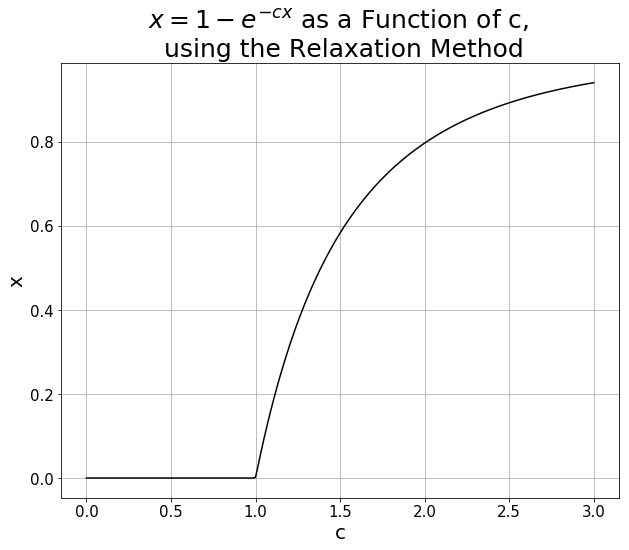


The final iteration is number  16 and the value here is  0.796812

The final iteration is number  16  and the value here is  0.796812
The final iteration is number  6  and the value here is  0.796812
The final iteration is number  7  and the value here is  0.796812
The final iteration is number  7  and the value here is  0.796812
The final iteration is number  2  and the value here is  1.0
The final iteration is number  35  and the value here is  0.796813
The final iteration is number  36  and the value here is  0.796813
The final iteration is number  164  and the value here is  0.79682

[0.5      0.3125   1.75625  ... 2.000002 1.999998 2.000002]
[0.25     1.6      0.489666 ... 0.399999 0.400001 0.399999]

The final iteration is number  4 .  The x-value here is  2.0  and the y-value here is  0.4 .


In [4]:
#PROBLEM 3

#PART A
#Defining constants for the problem 
c = 2       #exponent constant
acc = 1e-6  #accuracy threshold

#Relaxation method, start by initializing x and a counter variable
x = 1.0
counter = 0

#Look over 20 iterations with the relaxation method
for k in range(20):
    counter +=1
    x = 1 - np.exp(-c*x) #Iteratively calculate x
    print(counter, x)    #Print results every iteration

print()

#Define a function for the relaxation method (since we have to vary c now)
def relax(c):
    x = 1.0
    counter = 0
    for k in range(1000):
        counter +=1
        x = 1 - np.exp(-c*x)
    return x

#Create an array for the c values
c2 = np.arange(0, 3.01, 0.01)

#Apply the relaxation method for all c's
x_values = np.zeros(len(c2))
for i in range(len(c2)):
    x_values[i] = relax(c2[i])

#Plot x as a function of c
plt.figure(figsize=(10,8))
plt.plot(c2, x_values, color='k')
plt.title('$x = 1 - e^{-cx}$ as a Function of c, \n using the Relaxation Method', fontsize=25)
plt.xlabel('c', fontsize=20)
plt.ylabel('x', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('lab4_q3_plot1.pdf', bbox_inches='tight')
plt.show()

print()

#PART B
#Define a new relaxation function with a cutoff for the desired accuracy 
def relax2(c):
    x = 1.0
    x_array = np.zeros(1000)
    counter = 0
    for k in range(1000):
        counter +=1
        x_array[k] = x
        x = 1 - np.exp(-c*x)
        x = round(x, 6) #Round to 6th decimal places
        if x_array[k] == x_array[k - 1]: #Cut off the process when the number doesn't change up to 6 decimal places
            print("The final iteration is number ", counter, "and the value here is ", x_array[k])
            break
    return x, x_array

#Checking accuracy
accuracy_check = relax2(2)

print()

#Define a function for over relaxation with the same stopping condition as above
def over_relax(c, omega):
    x = 1.0
    x_array = np.zeros(1000)
    counter = 0
    for k in range(1000):
        counter += 1
        x_array[k] = x
        x = (1 + omega)*(1 - np.exp(-c*x)) - omega*x
        x = round(x, 6)
        if x_array[k] == x_array[k - 1]:
            print("The final iteration is number ", counter, " and the value here is ", x_array[k])
            break
    return x, x_array

#Experiment with values of omega
over_rel1 = over_relax(2, 0)
over_rel1 = over_relax(2, 0.5)
over_rel1 = over_relax(2, 0.51)
over_rel1 = over_relax(2, 0.49)

#Experiment with negative values of omega
over_rel1 = over_relax(2, -1)
over_rel1 = over_relax(2, -0.5)
over_rel1 = over_relax(2, -0.51)
over_rel1 = over_relax(2, -0.9)
over_rel1 = over_relax(2, -1.1)

print()

#PART C
#Define a and b
a = 1
b = 2

#Initial x and y values
x = 0.5
y = 0.25

#Initial function values
x_func_init = y*(a + x**2)
y_func_init = b/(a + x**2)

#Create empty arrays to save values
x_func_array = np.zeros(1000000)
y_func_array = np.zeros(1000000)

#Relaxation method
counter = 0
for k in range(1000000):
    counter += 1
    x_func_array[k] = x
    y_func_array[k] = y
    
    #Iterate through x, y, and the functions
    x = x_func_init
    x_func_init = y_func_init*(a + x_func_init**2)
    y = y_func_init
    y_func_init = b/(a + x_func_init**2)
    x = round(x, 6)
    y = round(y, 6)
    x_func_init = round(x_func_init, 6)
    y_func_init = round(y_func_init,6)
    if x_func_array[k] == x_func_array[k - 1] and y_func_array[k] == y_func_array[k - 1]:
        print("The final iteration is number ", counter, ".  The x-value here is ", x_func_array[k], " and the y-value here is ", y_func_array[k], ".")
        break
        
#The function never breaks after 1000000 so it likely never converges, at least not on a practical scale
#When we print the arrays we see that they do not converge and instead end up oscillating between 2 values
print(x_func_array)
print(y_func_array)
print()

#Finding a different way to rearrange the equations to make them converge
#Define a and b
a = 1
b = 2

#Initial x and y values
x = 0.5
y = 0.25

#Initial function values with functions that will converge
x_func2_init = np.sqrt(b/y - a)
y_func2_init = x/(a + x**2)

#Create empty arrays to save values
x_func2_array = np.zeros(1000)
y_func2_array = np.zeros(1000)

#Relaxation method
counter = 0
for k in range(1000):
    counter += 1
    x_func2_array[k] = x
    y_func2_array[k] = y
    
    #Iterate through x, y, and the functions
    x = x_func2_init
    x_func2_init = np.sqrt(b/y_func2_init - a)
    y = y_func2_init
    y_func2_init = x_func2_init/(a + x_func2_init**2)
    x = round(x, 6)
    y = round(y, 6)
    x_func2_init = round(x_func2_init, 6)
    y_func2_init = round(y_func2_init,6)
    if x_func2_array[k] == x_func2_array[k - 1] and y_func2_array[k] == y_func2_array[k - 1]:
        print("The final iteration is number ", counter, ".  The x-value here is ", x_func2_array[k], " and the y-value here is ", y_func2_array[k], ".")
        break
        
#The function breaks and converges